In [ ]:
                                                               
from pathlib import Path
import os

try:
                                                                                 
    PROJECT_DIR = Path(globals().get('_dh', [Path.cwd()])[0]).resolve()
except Exception:
    PROJECT_DIR = Path.cwd().resolve()

                                                                          
DATA_DIR = PROJECT_DIR
os.makedirs(DATA_DIR, exist_ok=True)

print(f"DATA_DIR set to: {DATA_DIR}")


In [8]:
import os, json, warnings, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
SAVE_PLOTS = False
ADD_EXTREMES = True


In [10]:
plt.style.use("default")     
warnings.filterwarnings("ignore", category=FutureWarning)


In [11]:
def quick_summary(name, df):
    """Prints basic shape, dtypes, NA counts; returns nothing."""
    print(f"\n{name} - {df.shape[0]:,} rows x {df.shape[1]} cols")
    display(df.head())
    display(pd.DataFrame({
        "dtype": df.dtypes,
        "n_missing": df.isna().sum()
    }).T)


In [12]:
def check_unique(df, key):
    dup = df[key].duplicated().sum()
    assert dup == 0, f" {dup} duplicate {key}s found"
    print(f" {key} unique")


In [13]:
users    = pd.read_csv(str(DATA_DIR / 'user.csv'))
trainers = pd.read_csv(str(DATA_DIR / 'PT_data.csv'))
engagement   = pd.read_csv(str(DATA_DIR / 'engagement.csv'))

quick_summary("USERS", users)
quick_summary("TRAINERS", trainers)
quick_summary("ENGAGEMENT", engagement)



USERS - 20,000 rows x 6 cols


,Unnamed: 0,user_id,age_group,health_goal,baseline_activity_level,engagement_persona
0,0,1,18-25,Injury Recovery & Rehabilitation,moderate,high
1,1,2,36-50,Injury Recovery & Rehabilitation,low,low
2,2,3,18-25,General Fitness & Wellness,high,high
3,3,4,26-35,Athletic Performance & Sports Rehab,moderate,medium
4,4,5,26-35,Muscle Gain,moderate,medium


,Unnamed: 0,user_id,age_group,health_goal,baseline_activity_level,engagement_persona
dtype,int64,int64,object,object,object,object
n_missing,0,0,0,0,0,0



TRAINERS - 1,000 rows x 8 cols


,trainer_id,name,videos_count,total_likes,workout_recommendations,athlete_rating,years_experience,specialities
0,1,Trainer 1,247,289134,154,4.2,22,"Prenatal Fitness, Yoga"
1,2,Trainer 2,114,122357,68,4.9,24,HIIT
2,3,Trainer 3,482,473810,43,3.2,8,"Yoga, Functional Training"
3,4,Trainer 4,403,317531,100,4.3,3,Pilates
4,5,Trainer 5,127,116388,141,4.4,3,"Muscle Building, Bodybuilding"


,trainer_id,name,videos_count,total_likes,workout_recommendations,athlete_rating,years_experience,specialities
dtype,int64,object,int64,int64,int64,float64,int64,object
n_missing,0,0,0,0,0,0,0,0



ENGAGEMENT - 179,986 rows x 8 cols


,Unnamed: 0,interaction_id,user_id,trainer_id,timestamp,video_completion_rate,adherence_score,feedback_score
0,0,1,1,616,2025-04-29 23:35:23,0.695,0.403,5
1,1,2,1,197,2025-07-06 07:55:23,0.850,0.752,4
2,2,3,1,680,2025-03-21 16:07:40,0.631,0.468,4
3,3,4,1,923,2025-05-28 12:11:35,0.741,0.372,5
4,4,5,1,428,2025-03-07 23:36:43,0.827,0.223,4


,Unnamed: 0,interaction_id,user_id,trainer_id,timestamp,video_completion_rate,adherence_score,feedback_score
dtype,int64,int64,int64,int64,object,float64,float64,int64
n_missing,0,0,0,0,0,0,0,0


In [14]:
                   
check_unique(users,    "user_id")
check_unique(trainers, "trainer_id")
check_unique(engagement,   "interaction_id")


 user_id unique
 trainer_id unique
 interaction_id unique


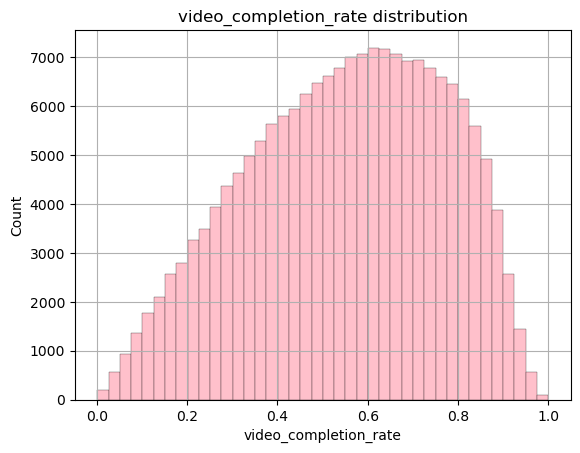

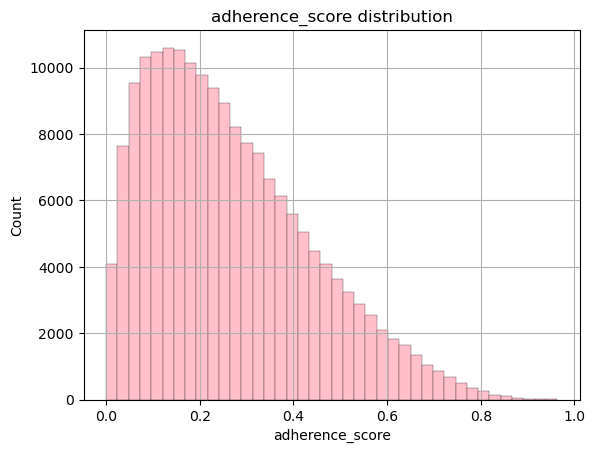

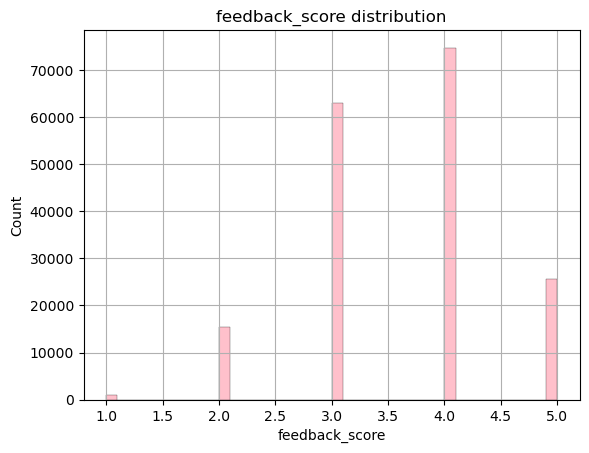

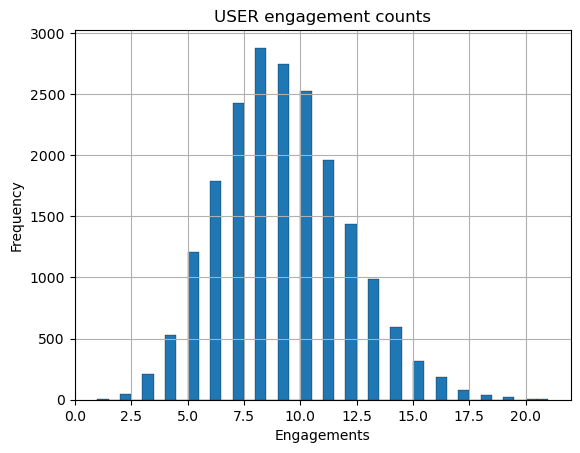

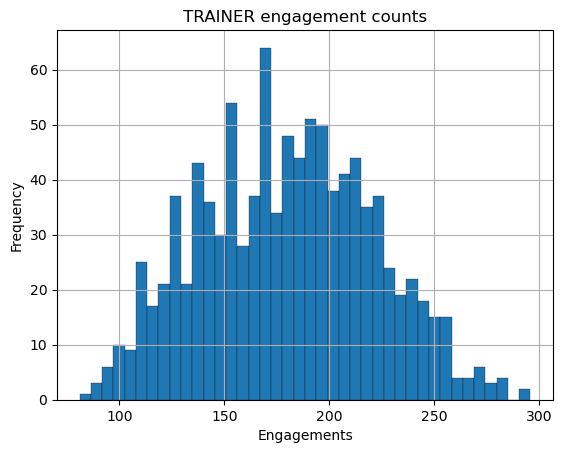

In [15]:
                    
metrics = ["video_completion_rate", "adherence_score", "feedback_score"]
for m in metrics:
    plt.figure()
    engagement[m].hist(bins=40, edgecolor='black', linewidth = 0.2, color = 'pink')
    plt.title(f"{m} distribution"); plt.xlabel(m); plt.ylabel("Count")
    

                                           
for label, group_key in [("USER", "user_id"), ("TRAINER", "trainer_id")]:
    counts = engagement.groupby(group_key).size()
    plt.figure()
    counts.hist(bins=40, edgecolor='black', linewidth = 0.2)
    plt.title(f"{label} engagement counts"); plt.xlabel("Engagements"); plt.ylabel("Frequency")
    


In [16]:
                           
fk_user_diff    = set(engagement.user_id)    - set(users.user_id)
fk_trainer_diff = set(engagement.trainer_id) - set(trainers.trainer_id)

assert not fk_user_diff,    f" {len(fk_user_diff)} events refer to unknown users"
assert not fk_trainer_diff, f" {len(fk_trainer_diff)} events refer to unknown trainers"
print("Foreign-key coverage looks good.")

                        
sample = (engagement.sample(5, random_state=42)
          .merge(users,   on="user_id",    how="left")
          .merge(trainers,on="trainer_id", how="left"))
display(sample.T)


Foreign-key coverage looks good.


,0,1,2,3,4
Unnamed: 0_x,58885,43946,109510,3946,80847
interaction_id,58886,43947,109511,3947,80848
user_id,6553,4890,12177,445,9000
trainer_id,936,328,97,788,581
timestamp,2025-02-06 13:23:20,2025-04-20 06:54:53,2025-07-17 06:50:45,2025-04-28 04:37:02,2025-04-06 03:45:04
video_completion_rate,0.322,0.169,0.387,0.162,0.895
adherence_score,0.169,0.038,0.134,0.031,0.22
feedback_score,4,2,2,2,4
Unnamed: 0_y,6552,4889,12176,444,8999
age_group,50+,36-50,26-35,26-35,26-35


 Extreme cases injected (user_id 99999): re-plotting affected distances


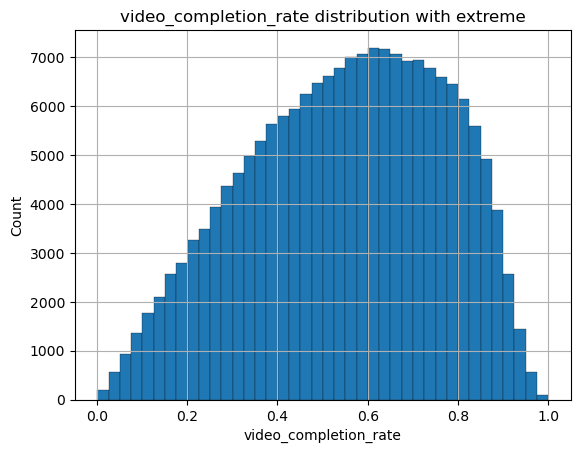

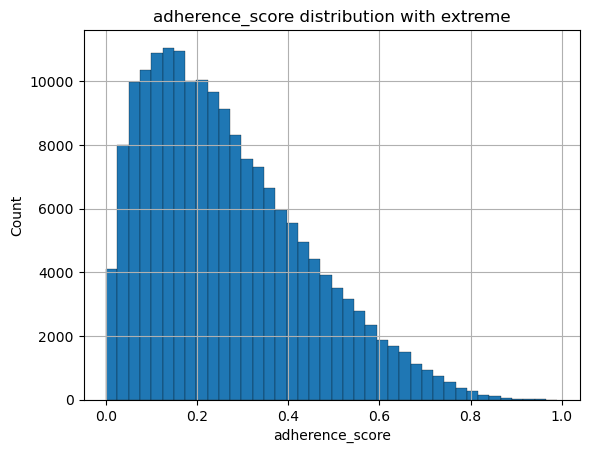

In [17]:
                        
if ADD_EXTREMES:
                                    
    u_ext = {
        "user_id": 99999, "age_group": "26-35", "health_goal": "Athletic Performance",
        "baseline_activity_level": "high", "engagement_persona": "high"
    }
    users = pd.concat([users, pd.DataFrame([u_ext])], ignore_index=True)

                                      
    e_ext = {
        "interaction_id": engagement.interaction_id.max() + 1,
        "user_id": 99999, "trainer_id": trainers.trainer_id.iloc[0],
        "timestamp": pd.Timestamp("2025-07-15 12:00:00"),
        "video_completion_rate": 1.0, "adherence_score": 0.99, "feedback_score": 5
    }
    events = pd.concat([engagement, pd.DataFrame([e_ext])], ignore_index=True)

    print(" Extreme cases injected (user_id 99999): re-plotting affected distances")
                                            
    for m in ["video_completion_rate", "adherence_score"]:
        plt.figure()
        events[m].hist(bins=40, edgecolor = 'black', linewidth = 0.2)
        plt.title(f"{m} distribution with extreme")
        plt.xlabel(m); plt.ylabel("Count")


In [18]:
users.to_csv(("user_data.cleaned.csv"), index=False)
trainers.to_csv(("PT_data.cleaned.csv"),    index=False)
events.to_csv(( "engagement_data.cleaned.csv"), index=False)
